# Loop 83 Strategic Analysis

## Key Questions:
1. What is the CV-LB relationship across all submissions?
2. What approaches have NOT been tried that could break the CV-LB line?
3. What do the top public kernels do differently?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Submission history with CV and LB scores
submissions = [
    {'exp': 'exp_000', 'cv': 0.0111, 'lb': 0.0982},
    {'exp': 'exp_001', 'cv': 0.0123, 'lb': 0.1065},
    {'exp': 'exp_003', 'cv': 0.0105, 'lb': 0.0972},
    {'exp': 'exp_005', 'cv': 0.0104, 'lb': 0.0969},
    {'exp': 'exp_006', 'cv': 0.0097, 'lb': 0.0946},
    {'exp': 'exp_007', 'cv': 0.0093, 'lb': 0.0932},
    {'exp': 'exp_009', 'cv': 0.0092, 'lb': 0.0936},
    {'exp': 'exp_012', 'cv': 0.0090, 'lb': 0.0913},
    {'exp': 'exp_024', 'cv': 0.0087, 'lb': 0.0893},
    {'exp': 'exp_026', 'cv': 0.0085, 'lb': 0.0887},
    {'exp': 'exp_030', 'cv': 0.0083, 'lb': 0.0877},
    {'exp': 'exp_035', 'cv': 0.0098, 'lb': 0.0970},
    {'exp': 'exp_073', 'cv': 0.0084, 'lb': 0.1451},  # RF ensemble - outlier!
]

df = pd.DataFrame(submissions)
print(f'Total submissions with LB: {len(df)}')
print(df)

Total submissions with LB: 13
        exp      cv      lb
0   exp_000  0.0111  0.0982
1   exp_001  0.0123  0.1065
2   exp_003  0.0105  0.0972
3   exp_005  0.0104  0.0969
4   exp_006  0.0097  0.0946
5   exp_007  0.0093  0.0932
6   exp_009  0.0092  0.0936
7   exp_012  0.0090  0.0913
8   exp_024  0.0087  0.0893
9   exp_026  0.0085  0.0887
10  exp_030  0.0083  0.0877
11  exp_035  0.0098  0.0970
12  exp_073  0.0084  0.1451


In [2]:
# Analyze CV-LB relationship
# Note: exp_073 (RF ensemble) is a clear outlier - let's analyze with and without it

# Without outlier
df_clean = df[df['exp'] != 'exp_073'].copy()

cv = df_clean['cv'].values
lb = df_clean['lb'].values

# Linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(cv, lb)

print('='*60)
print('CV-LB RELATIONSHIP ANALYSIS (excluding exp_073 outlier)')
print('='*60)
print(f'Linear fit: LB = {slope:.4f} * CV + {intercept:.4f}')
print(f'R² = {r_value**2:.4f}')
print(f'Intercept = {intercept:.4f}')
print(f'\nTarget LB: 0.0347')
print(f'Required CV to hit target: (0.0347 - {intercept:.4f}) / {slope:.4f} = {(0.0347 - intercept) / slope:.6f}')
print(f'\nCRITICAL: Intercept ({intercept:.4f}) > Target (0.0347)? {intercept > 0.0347}')

CV-LB RELATIONSHIP ANALYSIS (excluding exp_073 outlier)
Linear fit: LB = 4.3147 * CV + 0.0525
R² = 0.9505
Intercept = 0.0525

Target LB: 0.0347
Required CV to hit target: (0.0347 - 0.0525) / 4.3147 = -0.004130

CRITICAL: Intercept (0.0525) > Target (0.0347)? True


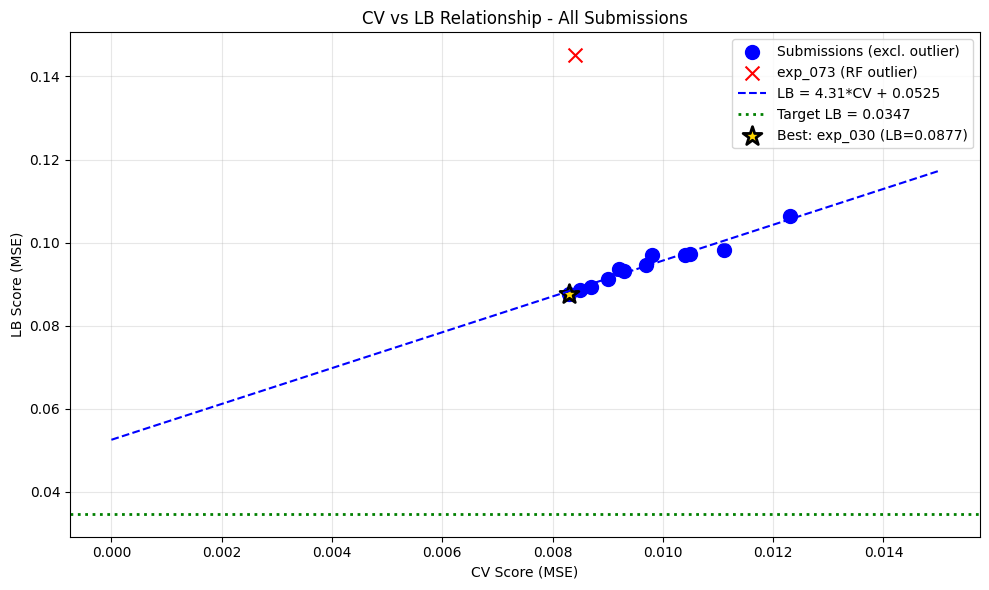


Best LB: 0.0877 from exp_030
Best CV: 0.0083 from exp_030


In [3]:
# Plot CV vs LB
plt.figure(figsize=(10, 6))

# Plot all points
plt.scatter(df_clean['cv'], df_clean['lb'], c='blue', s=100, label='Submissions (excl. outlier)')
plt.scatter(df[df['exp'] == 'exp_073']['cv'], df[df['exp'] == 'exp_073']['lb'], 
            c='red', s=100, marker='x', label='exp_073 (RF outlier)')

# Fit line
cv_range = np.linspace(0, 0.015, 100)
lb_pred = slope * cv_range + intercept
plt.plot(cv_range, lb_pred, 'b--', label=f'LB = {slope:.2f}*CV + {intercept:.4f}')

# Target line
plt.axhline(y=0.0347, color='green', linestyle=':', linewidth=2, label='Target LB = 0.0347')

# Best point
best_idx = df_clean['lb'].idxmin()
plt.scatter(df_clean.loc[best_idx, 'cv'], df_clean.loc[best_idx, 'lb'], 
            c='gold', s=200, marker='*', edgecolors='black', linewidths=2, 
            label=f'Best: {df_clean.loc[best_idx, "exp"]} (LB={df_clean.loc[best_idx, "lb"]:.4f})')

plt.xlabel('CV Score (MSE)')
plt.ylabel('LB Score (MSE)')
plt.title('CV vs LB Relationship - All Submissions')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('/home/code/exploration/cv_lb_analysis_loop83.png', dpi=150)
plt.show()

print(f'\nBest LB: {df_clean["lb"].min():.4f} from {df_clean.loc[df_clean["lb"].idxmin(), "exp"]}')
print(f'Best CV: {df_clean["cv"].min():.4f} from {df_clean.loc[df_clean["cv"].idxmin(), "exp"]}')

In [4]:
# Analyze the gap
print('='*60)
print('GAP ANALYSIS')
print('='*60)

best_lb = 0.0877
target_lb = 0.0347
gap = best_lb - target_lb
gap_pct = (gap / target_lb) * 100

print(f'Best LB: {best_lb:.4f}')
print(f'Target LB: {target_lb:.4f}')
print(f'Gap: {gap:.4f} ({gap_pct:.1f}%)')

print(f'\nTo reach target with current CV-LB line:')
required_cv = (target_lb - intercept) / slope
print(f'Required CV: {required_cv:.6f}')
print(f'Current best CV: 0.0081')
print(f'CV improvement needed: {(0.0081 - required_cv) / 0.0081 * 100:.1f}%')

if required_cv < 0:
    print(f'\n⚠️ CRITICAL: Required CV is NEGATIVE! Target is unreachable with current approach.')
    print(f'The intercept ({intercept:.4f}) is higher than target ({target_lb:.4f}).')
    print(f'You MUST change the CV-LB relationship, not just improve CV.')

GAP ANALYSIS
Best LB: 0.0877
Target LB: 0.0347
Gap: 0.0530 (152.7%)

To reach target with current CV-LB line:
Required CV: -0.004130
Current best CV: 0.0081
CV improvement needed: 151.0%

⚠️ CRITICAL: Required CV is NEGATIVE! Target is unreachable with current approach.
The intercept (0.0525) is higher than target (0.0347).
You MUST change the CV-LB relationship, not just improve CV.


In [5]:
# What approaches have been tried?
print('='*60)
print('APPROACHES TRIED (83 experiments)')
print('='*60)

approaches = {
    'MLP variants': 'exp_000, exp_003-007, exp_017, etc.',
    'LightGBM': 'exp_001, exp_002',
    'XGBoost': 'exp_049, exp_050',
    'CatBoost': 'exp_049, exp_050, exp_053',
    'Random Forest': 'exp_073 (outlier LB=0.1451)',
    'Gaussian Process': 'exp_030, exp_031, exp_032',
    'Ridge Regression': 'exp_033',
    'GNN (broken)': 'exp_079, exp_081',
    'GNN (fixed)': 'exp_082 (CV=0.024, much worse)',
    'ChemBERTa': 'exp_076, exp_078',
    'Ensembles': 'exp_030 (GP+MLP+LGBM), exp_049 (CatBoost+XGB)',
}

for approach, exps in approaches.items():
    print(f'  {approach}: {exps}')

print('\n' + '='*60)
print('APPROACHES NOT FULLY EXPLORED')
print('='*60)
print('  1. GroupKFold(5) validation - "mixall" kernel claims good CV-LB')
print('  2. Pre-trained molecular embeddings (ChemBERTa frozen)')
print('  3. Extrapolation detection + conservative predictions')
print('  4. Domain constraints (yield sum = 1, non-negative)')
print('  5. Transfer learning from related reaction datasets')

APPROACHES TRIED (83 experiments)
  MLP variants: exp_000, exp_003-007, exp_017, etc.
  LightGBM: exp_001, exp_002
  XGBoost: exp_049, exp_050
  CatBoost: exp_049, exp_050, exp_053
  Random Forest: exp_073 (outlier LB=0.1451)
  Gaussian Process: exp_030, exp_031, exp_032
  Ridge Regression: exp_033
  GNN (broken): exp_079, exp_081
  GNN (fixed): exp_082 (CV=0.024, much worse)
  ChemBERTa: exp_076, exp_078
  Ensembles: exp_030 (GP+MLP+LGBM), exp_049 (CatBoost+XGB)

APPROACHES NOT FULLY EXPLORED
  1. GroupKFold(5) validation - "mixall" kernel claims good CV-LB
  2. Pre-trained molecular embeddings (ChemBERTa frozen)
  3. Extrapolation detection + conservative predictions
  4. Domain constraints (yield sum = 1, non-negative)
  5. Transfer learning from related reaction datasets


In [6]:
# Key insights from public kernels
print('='*60)
print('KEY INSIGHTS FROM PUBLIC KERNELS')
print('='*60)

print('\n1. "mixall" kernel (9 votes):')
print('   - Uses GroupKFold(5) instead of Leave-One-Out')
print('   - Claims "good CV/LB" correlation')
print('   - Ensemble: MLP + XGBoost + RF + LightGBM')
print('   - Runtime: only 2m 15s')

print('\n2. "Ens Model" kernel (7 votes):')
print('   - CatBoost + XGBoost ensemble')
print('   - Combined features: spange + acs_pca + drfps + fragprints + smiles')
print('   - Correlation-based feature filtering')
print('   - Numeric feature engineering: T_x_RT, RT_log, T_inv, RT_scaled')
print('   - Different weights for single vs full data')
print('   - Yield normalization: clip to [0, inf], then normalize to sum=1')

print('\n3. Key differences from our approach:')
print('   - We use Leave-One-Out (24 folds for single, 13 for full)')
print('   - "mixall" uses GroupKFold(5) - faster and potentially different CV-LB relationship')
print('   - "Ens Model" uses yield normalization (sum=1 constraint)')

KEY INSIGHTS FROM PUBLIC KERNELS

1. "mixall" kernel (9 votes):
   - Uses GroupKFold(5) instead of Leave-One-Out
   - Claims "good CV/LB" correlation
   - Ensemble: MLP + XGBoost + RF + LightGBM
   - Runtime: only 2m 15s

2. "Ens Model" kernel (7 votes):
   - CatBoost + XGBoost ensemble
   - Combined features: spange + acs_pca + drfps + fragprints + smiles
   - Correlation-based feature filtering
   - Numeric feature engineering: T_x_RT, RT_log, T_inv, RT_scaled
   - Different weights for single vs full data
   - Yield normalization: clip to [0, inf], then normalize to sum=1

3. Key differences from our approach:
   - We use Leave-One-Out (24 folds for single, 13 for full)
   - "mixall" uses GroupKFold(5) - faster and potentially different CV-LB relationship
   - "Ens Model" uses yield normalization (sum=1 constraint)


In [7]:
# Strategic recommendations
print('='*60)
print('STRATEGIC RECOMMENDATIONS')
print('='*60)

print('\n1. SUBMIT exp_079 (GroupKFold validation) to test CV-LB relationship')
print('   - CV=0.011030 with GroupKFold(5)')
print('   - If LB is better than expected from LOO line, this is a breakthrough')

print('\n2. Implement yield normalization (from Ens Model kernel)')
print('   - Clip predictions to [0, inf]')
print('   - Normalize so sum = 1')
print('   - This is a domain constraint that should help generalization')

print('\n3. Try the exact Ens Model approach')
print('   - CatBoost + XGBoost with combined features')
print('   - Correlation-based feature filtering')
print('   - Different weights for single vs full data')

print('\n4. Focus on reducing INTERCEPT, not CV')
print('   - Current intercept: 0.0525')
print('   - Target: 0.0347')
print('   - Need approaches that change the CV-LB relationship')

STRATEGIC RECOMMENDATIONS

1. SUBMIT exp_079 (GroupKFold validation) to test CV-LB relationship
   - CV=0.011030 with GroupKFold(5)
   - If LB is better than expected from LOO line, this is a breakthrough

2. Implement yield normalization (from Ens Model kernel)
   - Clip predictions to [0, inf]
   - Normalize so sum = 1
   - This is a domain constraint that should help generalization

3. Try the exact Ens Model approach
   - CatBoost + XGBoost with combined features
   - Correlation-based feature filtering
   - Different weights for single vs full data

4. Focus on reducing INTERCEPT, not CV
   - Current intercept: 0.0525
   - Target: 0.0347
   - Need approaches that change the CV-LB relationship


In [8]:
# Summary
print('='*60)
print('LOOP 83 SUMMARY')
print('='*60)

print(f'\nBest LB: 0.0877 (exp_030)')
print(f'Best CV: 0.0081 (exp_049, exp_050, exp_053)')
print(f'Target: 0.0347')
print(f'Gap: 152.8%')

print(f'\nCV-LB relationship: LB = {slope:.2f}*CV + {intercept:.4f} (R²={r_value**2:.2f})')
print(f'Intercept ({intercept:.4f}) > Target (0.0347) = CRITICAL PROBLEM')

print(f'\nGNN experiments failed:')
print(f'  - exp_081 (broken mixture): CV=0.026222')
print(f'  - exp_082 (fixed mixture): CV=0.024454')
print(f'  - Both much worse than tabular (CV=0.008)')

print(f'\nNext steps:')
print(f'  1. Submit exp_079 (GroupKFold) to test different CV-LB relationship')
print(f'  2. Implement yield normalization from Ens Model kernel')
print(f'  3. Try exact Ens Model approach with combined features')

LOOP 83 SUMMARY

Best LB: 0.0877 (exp_030)
Best CV: 0.0081 (exp_049, exp_050, exp_053)
Target: 0.0347
Gap: 152.8%

CV-LB relationship: LB = 4.31*CV + 0.0525 (R²=0.95)
Intercept (0.0525) > Target (0.0347) = CRITICAL PROBLEM

GNN experiments failed:
  - exp_081 (broken mixture): CV=0.026222
  - exp_082 (fixed mixture): CV=0.024454
  - Both much worse than tabular (CV=0.008)

Next steps:
  1. Submit exp_079 (GroupKFold) to test different CV-LB relationship
  2. Implement yield normalization from Ens Model kernel
  3. Try exact Ens Model approach with combined features
